## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
allColumns = combinedData.columns
# Display the data table for preview
combinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
origMouseCount = len(combinedData["Mouse ID"].unique())
print(f"There are {origMouseCount} mice in this study before checking the data")

There are 249 mice in this study before checking the data


In [3]:
combinedData["Unique ID"] = combinedData["Mouse ID"].astype(str) + "_" + combinedData["Timepoint"].astype(str)
combinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unique ID
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
UIDCount = combinedData["Unique ID"].value_counts().astype(str)
UIDCount.head(10)

g989_5     2
g989_0     2
g989_20    2
g989_10    2
g989_15    2
a275_5     1
n678_10    1
j235_5     1
g316_45    1
z578_10    1
Name: Unique ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupMouse = combinedData.loc[combinedData["Mouse ID"] == "g989", :]
dupMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unique ID
908,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989_5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989_5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989_10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989_10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989_15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989_15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989_20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combinedData.loc[combinedData["Mouse ID"] != "g989", allColumns]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleanedMouseCount = len(cleaned_df["Mouse ID"].unique())
print(f"There are {cleanedMouseCount} mice in this study")

There are 248 mice in this study


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
RegimenGroup = cleaned_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])
tumorVolumeStats = RegimenGroup.loc[:,"Tumor Volume (mm3)"]
tumorVolumeStats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

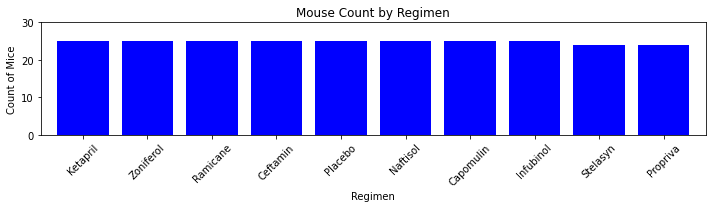

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
uniqueMice_df = cleaned_df.drop_duplicates(subset="Mouse ID", keep="first")
drugRegimenCount = uniqueMice_df["Drug Regimen"].value_counts()
plt.figure(figsize=(10,3))
drugRegimenCount.plot(kind="bar", facecolor="blue", rot=45, width=.8)
plt.title("Mouse Count by Regimen")
plt.xlabel("Regimen")
plt.ylabel("Count of Mice")
plt.tight_layout()
plt.ylim(0,30)
plt.tight_layout()

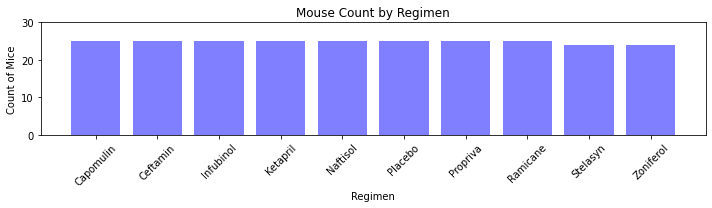

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugRegimenList = tumorVolumeStats.index
plt.figure(figsize=(10,3))
plt.bar(x=drugRegimenList, height=drugRegimenCount, color='blue', alpha=0.5, align="center")
plt.title("Mouse Count by Regimen")
plt.xticks(rotation=45)
plt.xlabel("Regimen")
plt.ylabel("Count of Mice")
plt.ylim(0,30)
plt.tight_layout()

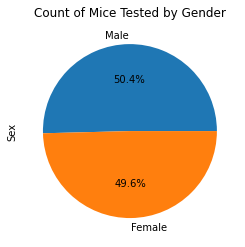

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseGender = uniqueMice_df["Sex"].value_counts()
mouseGender.plot(kind="pie", title="Count of Mice Tested by Gender", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

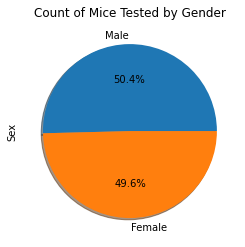

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouseGender, labels= ["Male", "Female"], shadow = True, autopct="%1.1f%%")
plt.title("Count of Mice Tested by Gender")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
fourRegimens = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin"), :]
sortedRegiments = fourRegimens.sort_values(by="Timepoint", ascending=False)
unsortedFinalVolume = sortedRegiments.drop_duplicates(subset="Mouse ID", keep="first")
finalVolume = unsortedFinalVolume.sort_values(by="Drug Regimen").reset_index(drop=True)
finalVolume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,l897,Capomulin,Male,17,19,45,38.846876,1
1,j246,Capomulin,Female,21,21,35,38.753265,1
2,b128,Capomulin,Female,9,22,45,38.982878,2
3,g288,Capomulin,Male,3,19,45,37.074024,1
4,j119,Capomulin,Female,7,23,45,38.125164,1
...,...,...,...,...,...,...,...,...
95,c458,Ramicane,Female,23,20,30,38.342008,2
96,k403,Ramicane,Male,21,16,45,22.050126,1
97,g791,Ramicane,Male,11,16,45,29.128472,1
98,q597,Ramicane,Male,20,25,45,45.220869,2


[Text(1, 0, 'Ceftamin')]

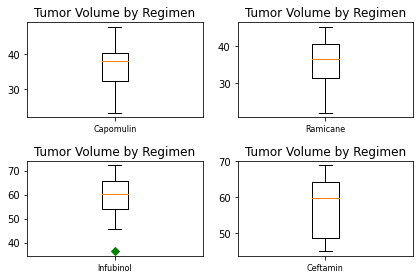

In [14]:
capoMulinTV = finalVolume.loc[finalVolume["Drug Regimen"] == "Capomulin", :]
ramicaneTV = finalVolume.loc[finalVolume["Drug Regimen"] == "Ramicane", :]
infubinolTV = finalVolume.loc[finalVolume["Drug Regimen"] == "Infubinol", :]
ceftaminTV = finalVolume.loc[finalVolume["Drug Regimen"] == "Ceftamin", :]

capoMulinTVList = capoMulinTV["Tumor Volume (mm3)"]
ramicaneTVList = ramicaneTV["Tumor Volume (mm3)"]
infubinolTVList = infubinolTV["Tumor Volume (mm3)"]
ceftaminTVList = ceftaminTV["Tumor Volume (mm3)"]

fig, ax = plt.subplots(2,2)

ax[0,0].boxplot(capoMulinTVList, 0, "gD")
ax[0,1].boxplot(ramicaneTVList, 0, "gD")
ax[1,0].boxplot(infubinolTVList, 0, "gD")
ax[1,1].boxplot(ceftaminTVList, 0, "gD")

ax[0,0].set_title("Tumor Volume by Regimen")
ax[0,1].set_title("Tumor Volume by Regimen")
ax[1,0].set_title("Tumor Volume by Regimen")
ax[1,1].set_title("Tumor Volume by Regimen")
plt.tight_layout()

ax[0,0].set_xticklabels(np.repeat("Capomulin", 2), rotation=0, fontsize=8)
ax[0,1].set_xticklabels(np.repeat("Ramicane", 2), rotation=0, fontsize=8)
ax[1,0].set_xticklabels(np.repeat("Infubinol", 2), rotation=0, fontsize=8)
ax[1,1].set_xticklabels(np.repeat("Ceftamin", 2), rotation=0, fontsize=8)


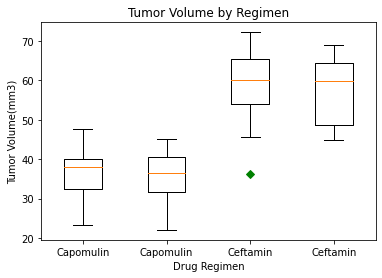

In [15]:
data = [capoMulinTVList, ramicaneTVList, infubinolTVList, ceftaminTVList]
fourRegimentListUnique = finalVolume["Drug Regimen"].unique()
fig, ax = plt.subplots()
plt.title("Tumor Volume by Regimen")
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Drug Regimen")
ax.boxplot(data, 0, "gD")
ax.set_xticklabels(np.repeat(fourRegimentListUnique, 2), rotation=0, fontsize=10)
plt.show()

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
apoMulinQuartiles = capoMulinTVList.quantile([.25,.5,.75])
apoMulinLowerq = apoMulinQuartiles[0.25]
apoMulinUpperq = apoMulinQuartiles[0.75]
apoMulinIqr = round(apoMulinUpperq-apoMulinLowerq, 2)

ramicaneQuartiles = ramicaneTVList.quantile([.25,.5,.75])
ramicaneLowerq = ramicaneQuartiles[0.25]
ramicaneUpperq = ramicaneQuartiles[0.75]
ramicaneIqr = round(ramicaneUpperq-ramicaneLowerq, 2)

infubinolQuartiles = infubinolTVList.quantile([.25,.5,.75])
infubinolLowerq = infubinolQuartiles[0.25]
infubinolUpperq = infubinolQuartiles[0.75]
infubinolIqr = round(infubinolUpperq-infubinolLowerq, 2)

ceftaminQuartiles = ceftaminTVList.quantile([.25,.5,.75])
ceftaminLowerq = ceftaminQuartiles[0.25]
ceftaminUpperq = ceftaminQuartiles[0.75]
ceftaminIqr = round(ceftaminUpperq-ceftaminLowerq, 2)


## Line and Scatter Plots

(34.96764437, 49.65133131)

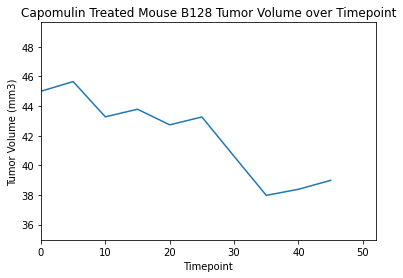

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseB128 = cleaned_df.loc[cleaned_df["Mouse ID"] == "b128", ["Mouse ID", "Drug Regimen", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]
plt.plot(mouseB128["Timepoint"], mouseB128["Tumor Volume (mm3)"])
plt.title("Capomulin Treated Mouse B128 Tumor Volume over Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, max(mouseB128["Timepoint"]) + 7)
plt.ylim(min(mouseB128["Tumor Volume (mm3)"]) - 3, max(mouseB128["Tumor Volume (mm3)"]) + 4)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

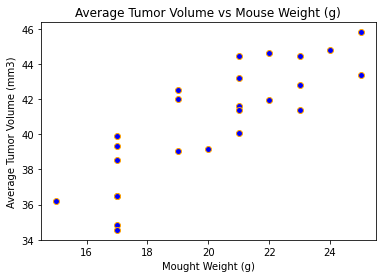

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin"),:]
capomulinNoDupeMice = capomulin_df.drop_duplicates(subset="Mouse ID", keep="first").sort_values("Mouse ID")
capomulinMeanTumorVolume = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": 'mean'}).sort_values("Mouse ID")

x_axis = capomulinNoDupeMice["Weight (g)"]
y_axis = capomulinMeanTumorVolume
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="orange")
plt.title("Average Tumor Volume vs Mouse Weight (g)")
plt.xlabel("Mought Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis.iloc[:,0])
vc_fit = vc_slope * x_axis + vc_int

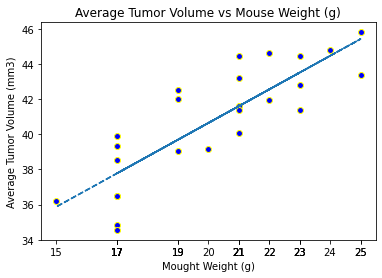

In [20]:
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="yellow")
plt.plot(x_axis,vc_fit,"--")
plt.xticks(x_axis)
plt.title("Average Tumor Volume vs Mouse Weight (g)")
plt.xlabel("Mought Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()